<a href="https://colab.research.google.com/github/priyesh1512/E-commerce/blob/main/FinalProjectBigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from itertools import combinations
from collections import Counter
import itertools


In [2]:
file_path="/content/CUSTOMERS.csv"

In [4]:
file_name_c="/content/CUSTOMERS.csv"

In [5]:

customers=pd.read_csv(file_name_c)

In [6]:
customers.head(2)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh


In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
customers.duplicated().sum()

np.int64(0)

In [9]:
customers.nunique()

,0
customer_id,99441
customer_unique_id,96096
customer_zip_code_prefix,14994
customer_city,4119
customer_state,20


In [10]:
file_name_g="/content/GEO_LOCATION.csv"

In [11]:
geo_loc=pd.read_csv(file_name_g)

In [12]:

geo_loc.head(2)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh


In [13]:
geo_loc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [14]:
#check duplicates
geo_loc.duplicated().sum()

np.int64(0)

In [15]:
# Check unique values
geo_loc.nunique()

,0
geolocation_zip_code_prefix,19015
geolocation_lat,18987
geolocation_lng,18988
geolocation_city,3809
geolocation_state,20


In [16]:
file_name_oi="/content/ORDER_ITEMS.csv"

In [17]:
order_item=pd.read_csv(file_name_oi)

In [18]:
order_item.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93


In [19]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
# change 'shipping_limit_date' column to date format
order_item['shipping_limit_date']=pd.to_datetime(order_item['shipping_limit_date'], format='%m/%d/%Y %H:%M')

In [21]:
#check duplicates
order_item.duplicated().sum()

np.int64(0)

In [22]:
#check unique value
order_item.nunique()

,0
order_id,98666
order_item_id,21
product_id,32951
seller_id,3095
shipping_limit_date,54615
price,5968
freight_value,6999


In [23]:
file_name_op="/content/ORDER_PAYMENTS.csv"

In [24]:
#import order payment.csv which has about Order payment information
order_payment=pd.read_csv(file_name_op)
order_payment.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [25]:
order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
#check duplicates
order_payment.duplicated().sum()

np.int64(0)

In [27]:
#Check unique information
order_payment.nunique()

,0
order_id,99440
payment_sequential,29
payment_type,5
payment_installments,24
payment_value,29077


In [28]:
file_name_or="/content/ORDER_REVIEW_RATINGS.csv"

In [29]:
#import order_review which has information about Customer ratings at order level
order_review=pd.read_csv(file_name_or)
order_review.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05


In [30]:
order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [31]:
# change 'review_creation_date & review_answer_timestamp' columns to date format
order_review['review_creation_date']=pd.to_datetime(order_review['review_creation_date'], format='%m/%d/%Y %H:%M')
order_review['review_answer_timestamp']=pd.to_datetime(order_review['review_answer_timestamp'], format='%m/%d/%Y %H:%M')

In [32]:
#Check dupicate values
order_review.duplicated().sum()

np.int64(0)

In [33]:
#check unique value
order_review.nunique()

,0
review_id,99173
order_id,99441
review_score,5
review_creation_date,637
review_answer_timestamp,89500


In [34]:
file_name_o="/content/ORDERS.csv"

In [35]:
#Import oeder.csv file which has  Orders info like ordered, product id, status, order dates etc..
order=pd.read_csv(file_name_o)
order.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00


In [36]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [37]:
# change 'order_purchase_timestamp,	order_approved_at,order_delivered_carrier_date,	order_delivered_customer_date&	order_estimated_delivery_date' columns to date format
order['order_purchase_timestamp']=pd.to_datetime(order['order_purchase_timestamp'], format='%m/%d/%Y %H:%M')
order['order_approved_at']=pd.to_datetime(order['order_approved_at'], format='%m/%d/%Y %H:%M')
order['order_delivered_carrier_date']=pd.to_datetime(order['order_delivered_carrier_date'], format='%m/%d/%Y %H:%M')
order['order_delivered_customer_date']=pd.to_datetime(order['order_delivered_customer_date'], format='%m/%d/%Y %H:%M')
order['order_estimated_delivery_date']=pd.to_datetime(order['order_estimated_delivery_date'], format='%m/%d/%Y %H:%M')

In [38]:
#check duplicate
order.duplicated().sum()

np.int64(0)

In [39]:
#check unique values
order.nunique()

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,88789
order_approved_at,50462
order_delivered_carrier_date,61544
order_delivered_customer_date,75649
order_estimated_delivery_date,459


In [40]:
file_name_p="/content/PRODUCTS.csv"

In [41]:
# import product.csv which has  Product information
products=pd.read_csv(file_name_p)
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [42]:
# get information about products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [43]:
#check duplicate
products.duplicated().sum()

np.int64(0)

In [44]:
#check unique values
products.nunique()

,0
product_id,32951
product_category_name,71
product_name_lenght,66
product_description_lenght,2960
product_photos_qty,19
product_weight_g,2204
product_length_cm,99
product_height_cm,102
product_width_cm,95


In [45]:
file_name_s="/content/SELLERS.csv"

In [46]:
#Impoer seller.csv which has  Sellers information
sellers=pd.read_csv(file_name_s)
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh


In [47]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [48]:
#check duplicate
sellers.duplicated().sum()

np.int64(0)

In [49]:
#check unique value
sellers.nunique()

,0
seller_id,3095
seller_zip_code_prefix,2225
seller_city,534
seller_state,19


In [50]:
#merge all the tabels
c_o=pd.merge(left=customers,right=order,left_on='customer_id',right_on='customer_id',how='left')
o1=pd.merge(left=c_o,right=order_review,left_on='order_id',right_on='order_id',how='left')
o2=pd.merge(left=o1,right=order_payment,left_on='order_id',right_on='order_id',how='left')
o3=pd.merge(left=o2,right=order_item,left_on='order_id',right_on='order_id',how='left')
o4=pd.merge(left=o3,right=products,left_on='product_id',right_on='product_id',how='left')
o5=pd.merge(left=o4,right=sellers,left_on='seller_id',right_on='seller_id',how='left')
final_df=pd.merge(left=o5,right=geo_loc,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='left')
final_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,...,64.0,31.0,8577.0,Vijayawada,Andhra Pradesh,14409.0,-20.509898,-47.397866,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,...,15.0,40.0,88303.0,Sadasivpet,Andhra Pradesh,9790.0,-23.726853,-46.545746,Adoni,Andhra Pradesh


In [51]:
#after merging tables together
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119151 entries, 0 to 119150
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119151 non-null  object        
 1   customer_unique_id             119151 non-null  object        
 2   customer_zip_code_prefix       119151 non-null  int64         
 3   customer_city                  119151 non-null  object        
 4   customer_state                 119151 non-null  object        
 5   order_id                       119151 non-null  object        
 6   order_status                   119151 non-null  object        
 7   order_purchase_timestamp       119151 non-null  datetime64[ns]
 8   order_approved_at              118974 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117065 non-null  datetime64[ns]
 10  order_delivered_customer_date  115730 non-null  datetime64[ns]
 11  

In [52]:
#check duplicate
final_df.duplicated().sum()

np.int64(0)

In [53]:
final_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state'],
      dtype='objec

In [54]:
#Total_revenue
final_df['payment_value'].sum()

np.float64(20581109.619999997)

In [55]:
#Total_products
final_df['product_id'].nunique()

32951

In [56]:
# Total_categories
final_df['product_category_name'].nunique()

71

In [57]:
#Total Quantity
final_df['order_item_id'].sum()

np.float64(141571.0)

In [58]:
#Total sellers
sellers['seller_id'].nunique()

3095

In [59]:
# Total locations
geo_loc['geolocation_zip_code_prefix'].nunique()

19015

In [60]:
#Total_city
geo_loc['geolocation_city'].nunique()

3809

In [61]:
#Total_customer
customers['customer_id'].nunique()

99441

Understanding how many new customers acquired every month

In [62]:
#it's giving the first order date of every customer
first_order=final_df.groupby(['customer_id'])[['order_purchase_timestamp']].min().reset_index()
first_order.head(5)

,customer_id,order_purchase_timestamp
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:00
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:00
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:00
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:00
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:00


In [63]:
new_customer=first_order.groupby([first_order['order_purchase_timestamp'].dt.year,first_order['order_purchase_timestamp'].dt.month])[['customer_id']].count()
new_customer=new_customer.rename_axis(['Year','Month'])
new_customer.rename(columns={'customer_id':'New_Customer'},inplace=True)
new_customer

New_Customer
Year Month              
2016 9                 4
     10              324
     12                1
2017 1               800
     2              1780
     3              2682
     4              2404
     5              3700
     6              3245
     7              4026
     8              4331
     9              4285
     10             4631
     11             7544
     12             5673
2018 1              7269
     2              6728
     3              7211
     4              6939
     5              6873
     6              6167
     7              6292
     8              6512
     9                16
     10                4

<Figure size 1000x600 with 0 Axes>

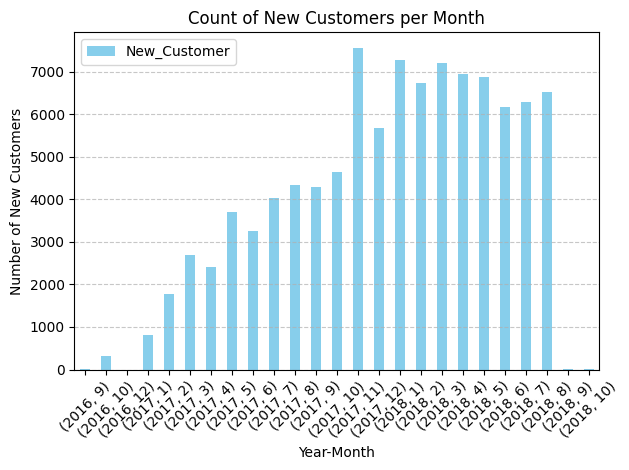

In [64]:
#plotting the graph
plt.figure(figsize=(10, 6))
new_customer.plot(kind='bar', color='skyblue')
plt.title('Count of New Customers per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of New Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Understand the retention of customers on month on month basis

In [65]:

# Extract year and month from 'order_purchase_timestamp'
final_df['order_month'] = final_df['order_purchase_timestamp'].dt.to_period('M')

# Group by 'order_month' and count unique customers for each month
customer_counts = final_df.groupby('order_month')['customer_unique_id'].nunique()

# Shift the customer counts by one month to represent the previous month's customer count
previous_month_customers = customer_counts.shift(1)

# Calculate the number of retained customers
retained_customers = customer_counts.combine(previous_month_customers, func=min)

# Calculate retention rate
retention_rate = (retained_customers / previous_month_customers) * 100

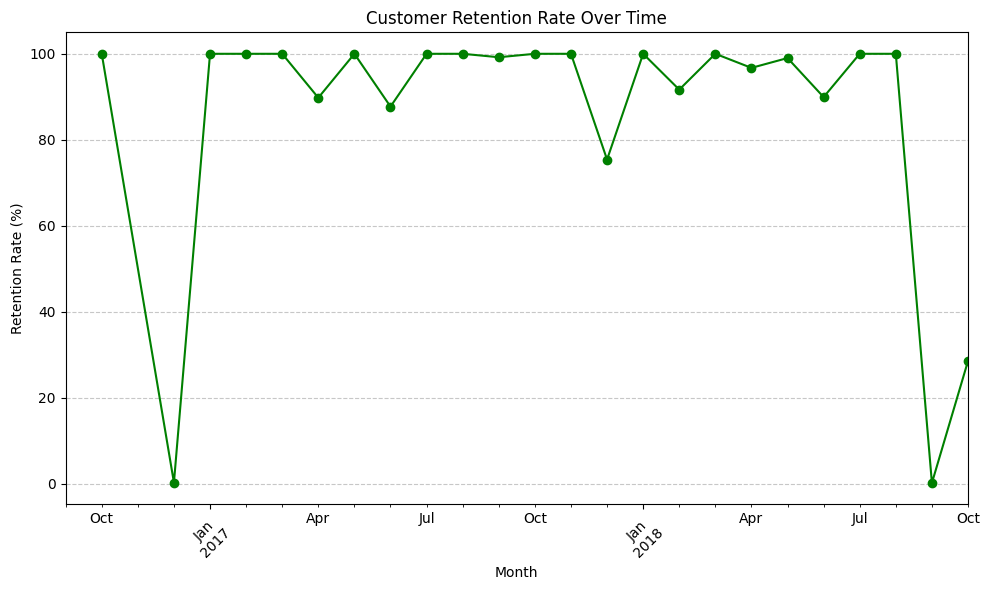

In [66]:
# Plot the retention rate over time
plt.figure(figsize=(10, 6))
retention_rate.plot(kind='line', marker='o', color='green')
plt.title('Customer Retention Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

How the revenues from existing/new customers on month on month basis

<Figure size 1000x600 with 0 Axes>

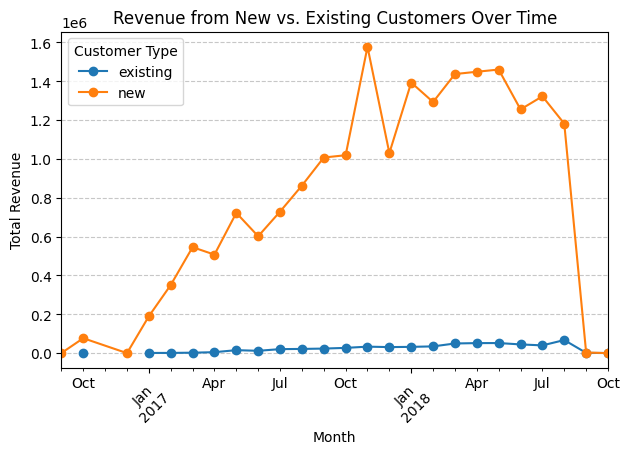

In [67]:
# Determine the first purchase date for each customer
first_purchase=final_df.groupby('customer_unique_id')['order_purchase_timestamp'].min()

# Mark customers as new or existing based on their first purchase date
final_df['customer_type']=final_df.apply(lambda x : 'new' if x['order_purchase_timestamp']==first_purchase[x['customer_unique_id']] else 'existing',axis=1 )

# Calculate total revenue generated by new and existing customers for each month
revenue_by_customer_type=final_df.groupby(['order_month', 'customer_type'])['payment_value'].sum().unstack()

# Plot the revenues from new and existing customers over time
plt.figure(figsize=(10, 6))
revenue_by_customer_type.plot(kind='line', marker='o')
plt.title('Revenue from New vs. Existing Customers Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

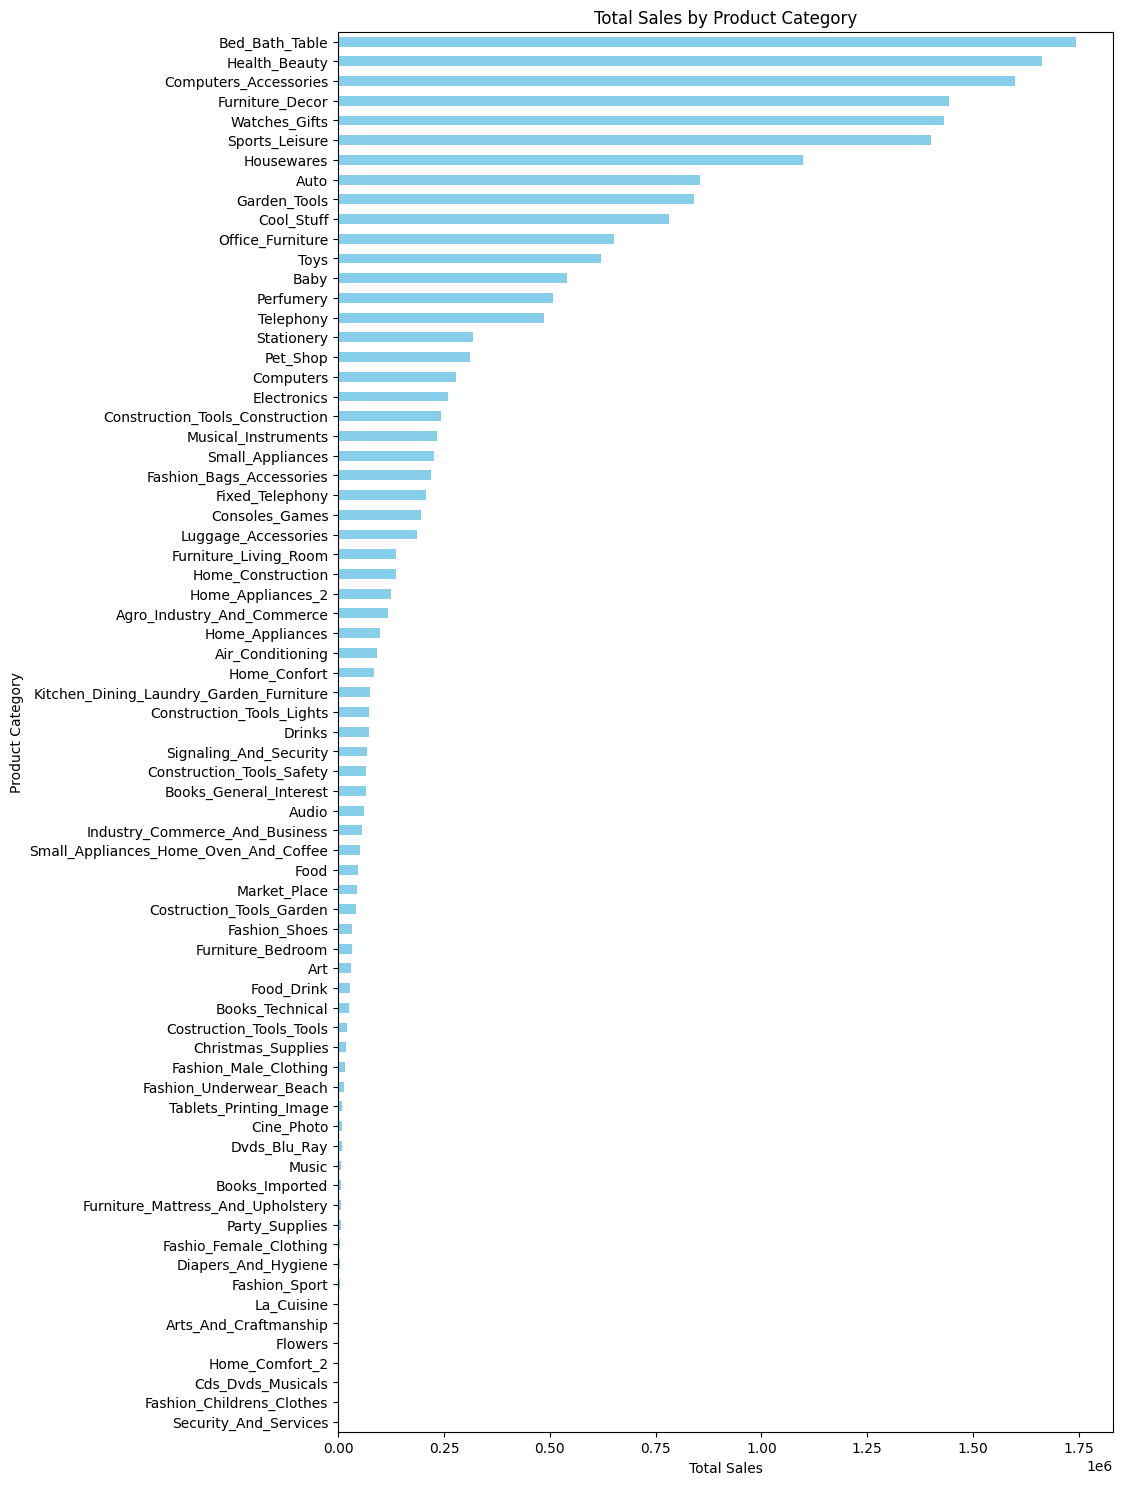

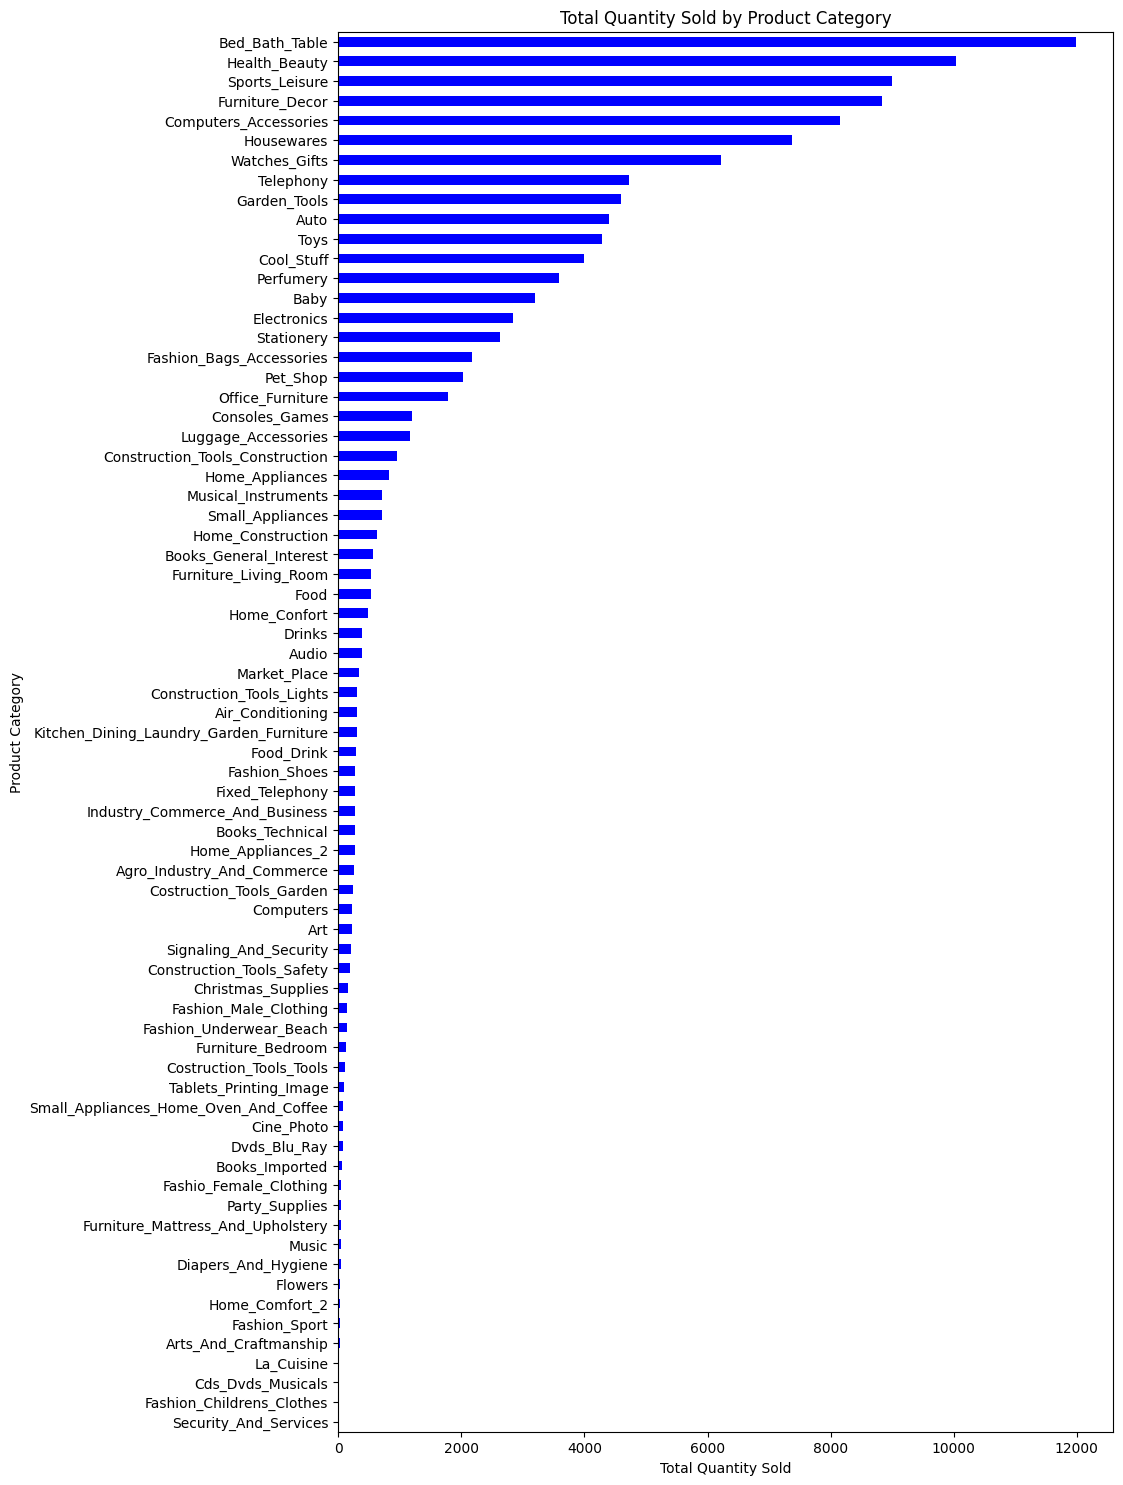

In [68]:
# Extract relevant time components
final_df['order_month'] = final_df['order_purchase_timestamp'].dt.to_period('M')
final_df['order_week']=final_df['order_purchase_timestamp'].dt.to_period('W')
final_df['order_day']=final_df['order_purchase_timestamp'].dt.date
final_df['order_hour']=final_df['order_purchase_timestamp'].dt.hour

# Sales and Quantity Trends by Category
sales_by_category=final_df.groupby(['product_category_name'])['payment_value'].sum()
quantity_by_category=final_df.groupby(['product_category_name'])['order_item_id'].count()

#Bar chart for Total sales by product category
plt.figure(figsize=(10, 40))
plt.subplot(2, 1, 1)
sales_by_category.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.show()

#Bar chart for Total Quantity by product category
plt.figure(figsize=(10,40))
plt.subplot(2,1,1)
quantity_by_category.sort_values().plot(kind='barh',color='blue')
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Category')
plt.show()

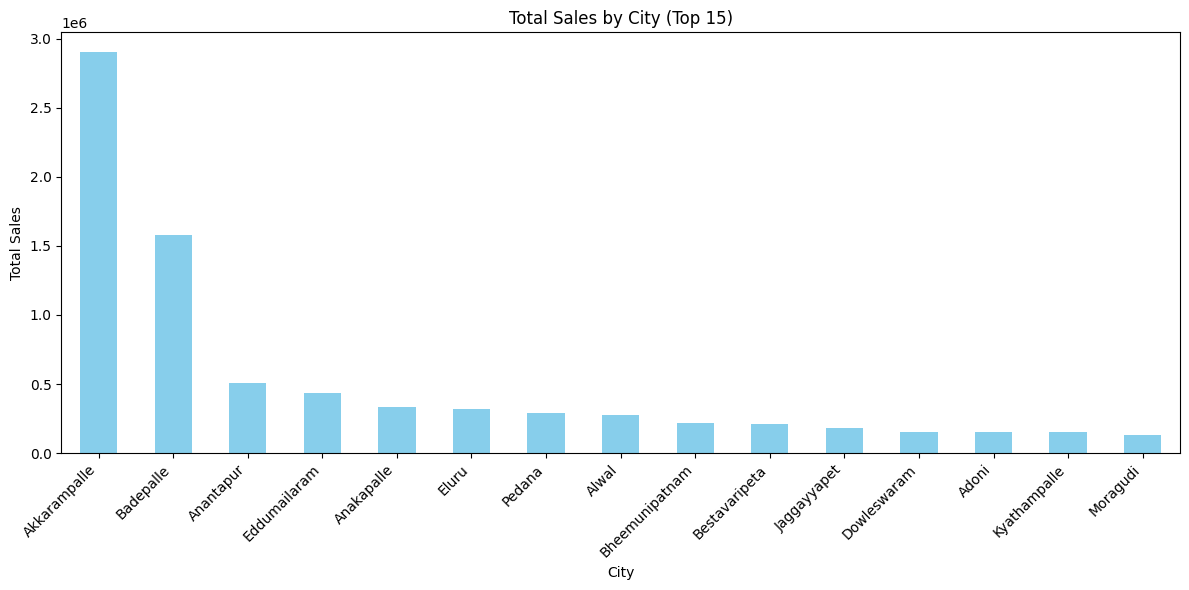

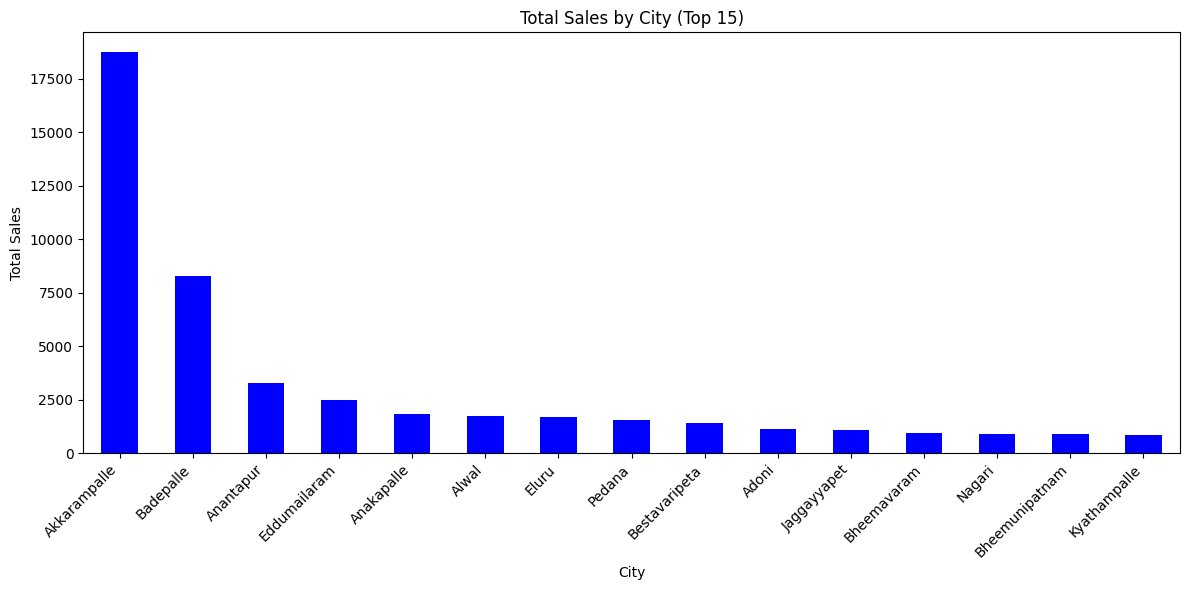

In [69]:
#Sales and Quantity Trends by location
sales_by_location=final_df.groupby(['customer_city'])['payment_value'].sum()
quantity_by_location=final_df.groupby(['customer_city'])['order_item_id'].count()

#Bar chart for Total sales by  location
plt.figure(figsize=(12,6))
sales_by_location.sort_values(ascending=False)[:15].plot(kind='bar',color='skyblue')
plt.title('Total Sales by City (Top 15)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45,ha='right' )
plt.tight_layout()
plt.show()

#Bar chart for Total Quantity by  location
plt.figure(figsize=(12,6))
quantity_by_location.sort_values(ascending=False)[:15].plot(kind='bar',color='blue')
plt.title('Total Sales by City (Top 15)')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45,ha='right' )
plt.tight_layout()
plt.show()


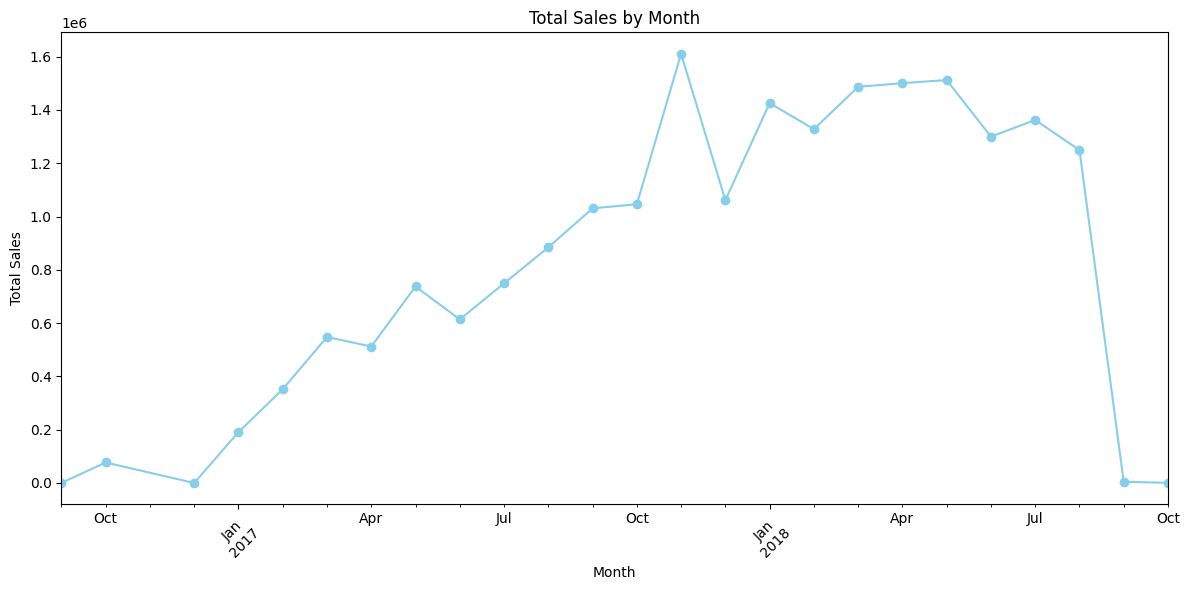

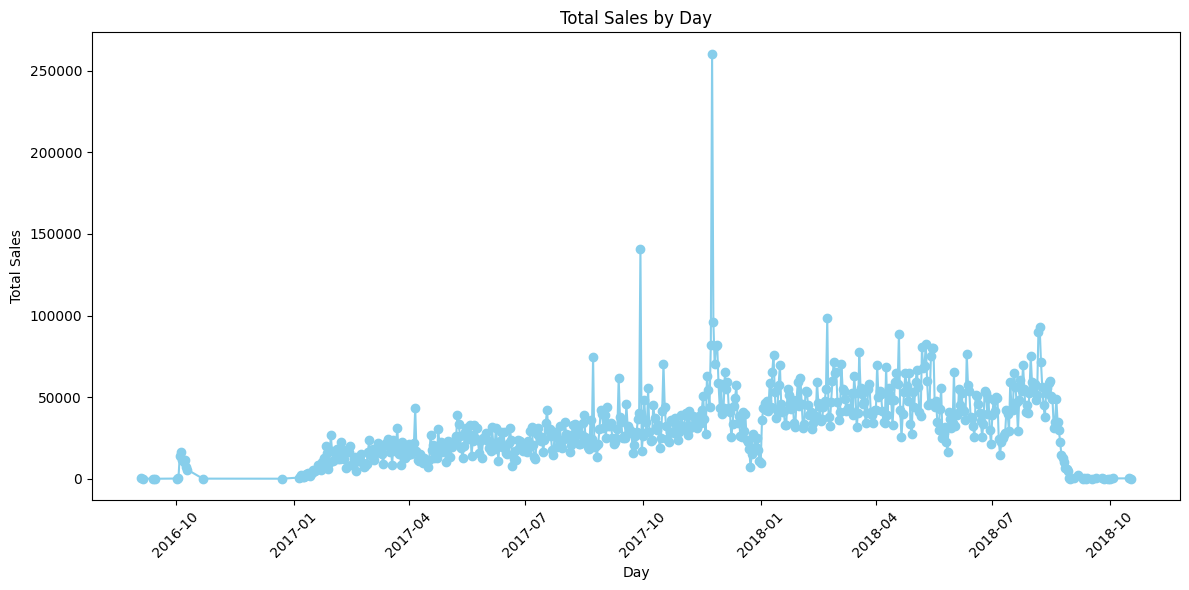

In [70]:
# Sales and Quantity Trends by Time Periods
sales_by_month = final_df.groupby('order_month')['payment_value'].sum()
sales_by_week = final_df.groupby('order_week')['payment_value'].sum()
sales_by_day = final_df.groupby('order_day')['payment_value'].sum()
sales_by_hour = final_df.groupby('order_hour')['payment_value'].sum()

#Line chart for total sales by month
plt.figure(figsize=(12, 6))
sales_by_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Line chart for total sales by day
plt.figure(figsize=(12, 6))
sales_by_day.plot(kind='line',marker='o',  color='skyblue')
plt.title('Total Sales by Day')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

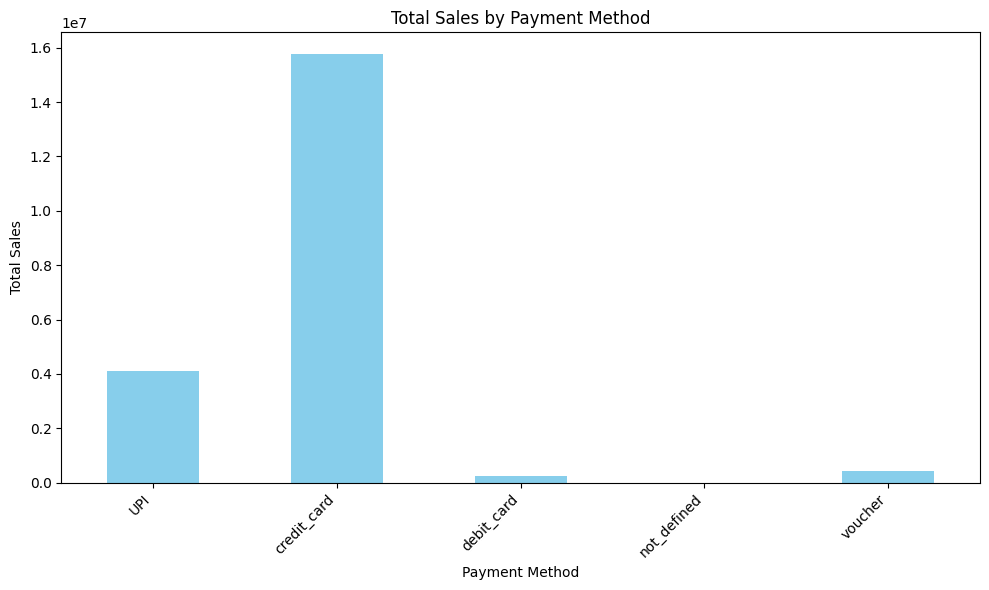

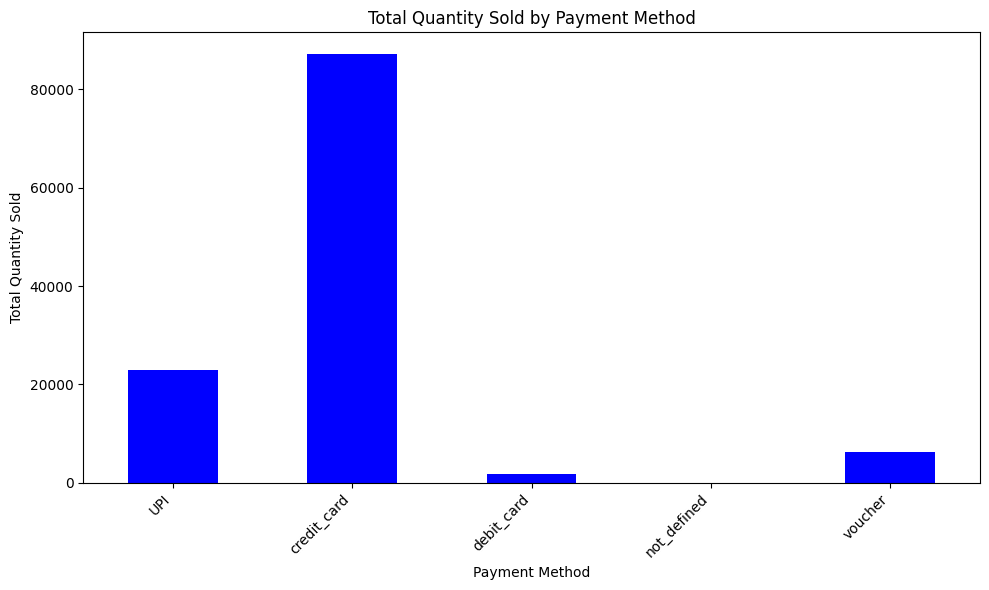

In [71]:
# Sales and Quantity Trends by Payment Method
sales_by_payment_method = final_df.groupby('payment_type')['payment_value'].sum()
quantity_by_payment_method = final_df.groupby('payment_type')['order_item_id'].count()

#Bar chart for Total Sales by Payment Method
plt.figure(figsize=(10, 6))
sales_by_payment_method.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Bar chart for Total Quantity Sold by Payment Method
plt.figure(figsize=(10, 6))
quantity_by_payment_method.plot(kind='bar', color='blue')
plt.title('Total Quantity Sold by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 Popular Products by month, seller, state, category.

In [72]:
#popolar product by month
popular_product_by_month=final_df.groupby(['order_month','product_id']).size().reset_index(name='frequency').sort_values(by=['order_month','frequency'],ascending=[True, False])
top_product_by_month = popular_product_by_month.groupby('order_month').head(1)
top_product_by_month

,order_month,product_id,frequency
0,2016-09,5a6b04657a4c5ee34285d1e4619a96b4,3
257,2016-10,eba7488e1c67729f045ab43fac426f2e,11
278,2016-12,f5d8f4fbc70ca2a0038b9a0010ed5cb0,1
647,2017-01,985c412b0ac92ed9d8a76bbeab6d44eb,16
1216,2017-02,42fffc68ff7e8176f11baaf4a4227557,13
3013,2017-03,7e0dc102074f8285580c9777f79c90cf,45
4902,2017-04,99a4788cb24856965c36a24e339b6058,41
7009,2017-05,99a4788cb24856965c36a24e339b6058,66
8489,2017-06,42a2c92a0979a949ca4ea89ec5c7b934,73
12381,2017-07,f1c7f353075ce59d8a6f3cf58f419c9c,63


In [73]:
#popular product by seller
popular_product_by_seller=final_df.groupby(['seller_id','product_id']).size().reset_index(name='frequency').sort_values(by=['seller_id','frequency'],ascending=[True,False])
top_product_by_seller = popular_product_by_seller.groupby('seller_id').head(1)
top_product_by_seller

,seller_id,product_id,frequency
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,115
12,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
14,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
37,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
...,...,...,...
34388,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
34397,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
34402,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
34430,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6


In [74]:
#popular product by state
popular_product_by_state=final_df.groupby(['customer_state','product_id']).size().reset_index(name='frequency').sort_values(by=['customer_state','frequency'],ascending=[True,False])
top_product_by_state = popular_product_by_state.groupby('customer_state').head(1)
top_product_by_state

,customer_state,product_id,frequency
16353,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,346
24307,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,12
26503,Chhattisgarh,422879e10f46682990de24d770e7f83d,42
30802,Delhi,53759a2ecddad2bb87a079a1f1519f73,25
32584,Goa,2a5806f10d0f00e5ad032dd2e3c8806e,1
36062,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,52
38231,Haryana,35afc973633aaeb6b877ff57b2793310,17
39873,Himachal Pradesh,422879e10f46682990de24d770e7f83d,6
41114,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
42520,Karnataka,422879e10f46682990de24d770e7f83d,25


In [75]:
#popular product by category
popular_product_by_category=final_df.groupby(['product_category_name','product_id']).size().reset_index(name='frequency').sort_values(by=['product_category_name','frequency'],ascending=[True,False])
top_product_by_category = popular_product_by_category.groupby('product_category_name').head(1)
top_product_by_category

,product_category_name,product_id,frequency
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,44
144,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
218,Art,4fe644d766c7566dbc46fb851363cb3b,109
267,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
316,Audio,db5efde3ad0cc579b130d71c4b2db522,50
...,...,...,...
28426,Stationery,fb55982be901439613a95940feefd9ee,85
28449,Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4,35
29470,Telephony,e7cc48a9daff5436f63d3aad9426f28b,100
30360,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,106


 Popular categories by state, month

In [76]:
#popular category by state
popular_category_by_state=final_df.groupby(['customer_state','product_category_name']).size().reset_index(name='frequency').sort_values(by=['customer_state','frequency'],ascending=[True,False])
top_category_by_state = popular_product_by_state.groupby('customer_state').head(1)
top_category_by_state

,customer_state,product_id,frequency
16353,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,346
24307,Arunachal Pradesh,03e1c946c0ddfc58724ff262aef08dff,12
26503,Chhattisgarh,422879e10f46682990de24d770e7f83d,42
30802,Delhi,53759a2ecddad2bb87a079a1f1519f73,25
32584,Goa,2a5806f10d0f00e5ad032dd2e3c8806e,1
36062,Gujarat,aca2eb7d00ea1a7b8ebd4e68314663af,52
38231,Haryana,35afc973633aaeb6b877ff57b2793310,17
39873,Himachal Pradesh,422879e10f46682990de24d770e7f83d,6
41114,Jammu & Kashmir,89b190a046022486c635022524a974a8,15
42520,Karnataka,422879e10f46682990de24d770e7f83d,25


In [77]:
#popular category by month
popular_category_by_month=final_df.groupby(['order_month','product_category_name']).size().reset_index(name='frequency').sort_values(by=['order_month','frequency'],ascending=[True,False])
top_category_by_month = popular_product_by_month.groupby('order_month').head(1)
top_category_by_month

,order_month,product_id,frequency
0,2016-09,5a6b04657a4c5ee34285d1e4619a96b4,3
257,2016-10,eba7488e1c67729f045ab43fac426f2e,11
278,2016-12,f5d8f4fbc70ca2a0038b9a0010ed5cb0,1
647,2017-01,985c412b0ac92ed9d8a76bbeab6d44eb,16
1216,2017-02,42fffc68ff7e8176f11baaf4a4227557,13
3013,2017-03,7e0dc102074f8285580c9777f79c90cf,45
4902,2017-04,99a4788cb24856965c36a24e339b6058,41
7009,2017-05,99a4788cb24856965c36a24e339b6058,66
8489,2017-06,42a2c92a0979a949ca4ea89ec5c7b934,73
12381,2017-07,f1c7f353075ce59d8a6f3cf58f419c9c,63


List top 10 most expensive products sorted by price

In [78]:
#listing the top 10 products sorted by price
top10_product=final_df[['product_id','product_category_name','price']].sort_values(by= 'price',ascending=False).head(10).reset_index()
top10_product

,index,product_id,product_category_name,price
0,16177,489ae2aa008f021502940f251d4cce7f,Housewares,6735.00
1,25418,69c590f7ffc7bf8db97190b6cb6ed62e,Computers,6729.00
2,4700,1bdf5e6731585cf01aa8169c7028d6ad,Art,6499.00
3,32766,a6492cc69376c469ab6f61d8f44de961,Small_Appliances,4799.00
4,14462,c3ed642d592594bb648ff4a04cee2747,Small_Appliances,4690.00
5,48803,259037a6a41845e455183f89c5035f18,Computers,4590.00
6,77294,a1beef8f3992dbd4cd8726796aa69c53,Musical_Instruments,4399.87
7,7094,6cdf8fc1d741c76586d8b6b15e9eef30,Consoles_Games,4099.99
8,108144,dd113cb02b2af9c8e5787e8f1f0722f6,Sports_Leisure,4059.00
9,100520,6902c1962dd19d540807d0ab8fade5c6,Watches_Gifts,3999.90


**Performing Customers/sellers Segmentation**

Divide the customers into groups based on the revenue generated

In [79]:
# total revenue for each customer
customer_revenue = final_df.groupby(['customer_id'])[['payment_value']].sum().reset_index()
# decile analysis for customers
customer_revenue['customer_decile'] = pd.qcut(customer_revenue['payment_value'], q=10, labels=False)
#  customer types categories based on decile results for customers
customer_revenue['customer_category'] = pd.qcut(customer_revenue['payment_value'], q=4, labels=['bronze', 'silver', 'gold', 'platinum'])

#result
customer_revenue

,customer_id,payment_value,customer_decile,customer_category
0,00012a2ce6f8dcda20d059ce98491703,114.74,5,gold
1,000161a058600d5901f007fab4c27140,67.41,2,silver
2,0001fd6190edaaf884bcaf3d49edf079,195.42,7,gold
3,0002414f95344307404f0ace7a26f1d5,179.35,7,gold
4,000379cdec625522490c315e70c7a9fb,107.01,4,silver
...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,81.36,3,silver
99437,fffeda5b6d849fbd39689bb92087f431,63.13,2,silver
99438,ffff42319e9b2d713724ae527742af25,214.13,7,platinum
99439,ffffa3172527f765de70084a7e53aae8,91.00,4,silver


Divide the sellers into groups based on the revenue generated

In [80]:
# total revenue for each seller
seller_revenue = final_df.groupby(['seller_id'])[['payment_value']].sum().reset_index()
# decile analysis for seller
seller_revenue['seller_decile'] = pd.qcut(seller_revenue['payment_value'], q=10, labels=False)
#  seller types categories based on decile results for customers
seller_revenue['seller_category'] = pd.qcut(seller_revenue['payment_value'], q=4, labels=['bronze', 'silver', 'gold', 'platinum'])

#result
seller_revenue

,seller_id,payment_value,seller_decile,seller_category
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,6,gold
1,001cca7ae9ae17fb1caed9dfb1094831,48349.22,9,platinum
2,001e6ad469a905060d959994f1b41e4f,267.94,2,bronze
3,002100f778ceb8431b7a1020ff7ab48f,2478.33,6,gold
4,003554e2dce176b5555353e4f3555ac8,139.38,1,bronze
...,...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,79.52,0,bronze
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,3607.52,6,gold
3092,ffeee66ac5d5a62fe688b9d26f83f534,2259.55,6,gold
3093,fffd5413c0700ac820c7069d66d98c89,12834.27,8,platinum


**Cross-Selling**

In [81]:
#product list purchased by customer in 1 day
product_list = final_df.groupby(['customer_id', 'order_month']).agg({'product_category_name': lambda x: x.ravel().tolist()}).reset_index()

#list of products which have more than 1 in the list
combinations_list = []
for row in product_list.product_category_name:
    combinations = list(itertools.combinations(row, 2))
    combinations_list.append(combinations)

#for count of combinations
combination_counts = pd.Series(combinations_list).explode().reset_index(drop=True)

#finding a combination of 2 products
combination_of_2_produuct =combination_counts.value_counts()

#top 10 2 product combination
combination_of_2_produuct.head(10)

<ipython-input-81-a37d04d6f6a9>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  product_list = final_df.groupby(['customer_id', 'order_month']).agg({'product_category_name': lambda x: x.ravel().tolist()}).reset_index()


,count
"(Bed_Bath_Table, Bed_Bath_Table)",5931
"(Furniture_Decor, Furniture_Decor)",4526
"(Housewares, Housewares)",3137
"(Computers_Accessories, Computers_Accessories)",2791
"(Garden_Tools, Garden_Tools)",2569
"(Sports_Leisure, Sports_Leisure)",2071
"(Health_Beauty, Health_Beauty)",2067
"(Office_Furniture, Office_Furniture)",1687
"(Watches_Gifts, Watches_Gifts)",915
"(Telephony, Telephony)",898


In [82]:
# for  finding 3 product combinations

combinations_list = []
for row in product_list.product_category_name:
    combinations = list(itertools.combinations(row, 3))
    combinations_list.append(combinations)

#for count of combinations
combination_counts_3 = pd.Series(combinations_list).explode().reset_index(drop=True)

#finding a combination of 2 products
combination_of_3_produuct =combination_counts_3.value_counts()

#top 10 2 product combination
combination_of_3_produuct.head(10)

,count
"(Bed_Bath_Table, Bed_Bath_Table, Bed_Bath_Table)",22284
"(Office_Furniture, Office_Furniture, Office_Furniture)",9615
"(Garden_Tools, Garden_Tools, Garden_Tools)",7912
"(Bed_Bath_Table, Bed_Bath_Table, Housewares)",6392
"(Bed_Bath_Table, Housewares, Bed_Bath_Table)",6164
"(Housewares, Bed_Bath_Table, Bed_Bath_Table)",5532
"(Furniture_Decor, Furniture_Decor, Furniture_Decor)",5427
"(Housewares, Housewares, Housewares)",5117
"(Computers_Accessories, Computers_Accessories, Computers_Accessories)",4930
"(Housewares, Bed_Bath_Table, Housewares)",3094


Payment Behaviour

How customers are paying?



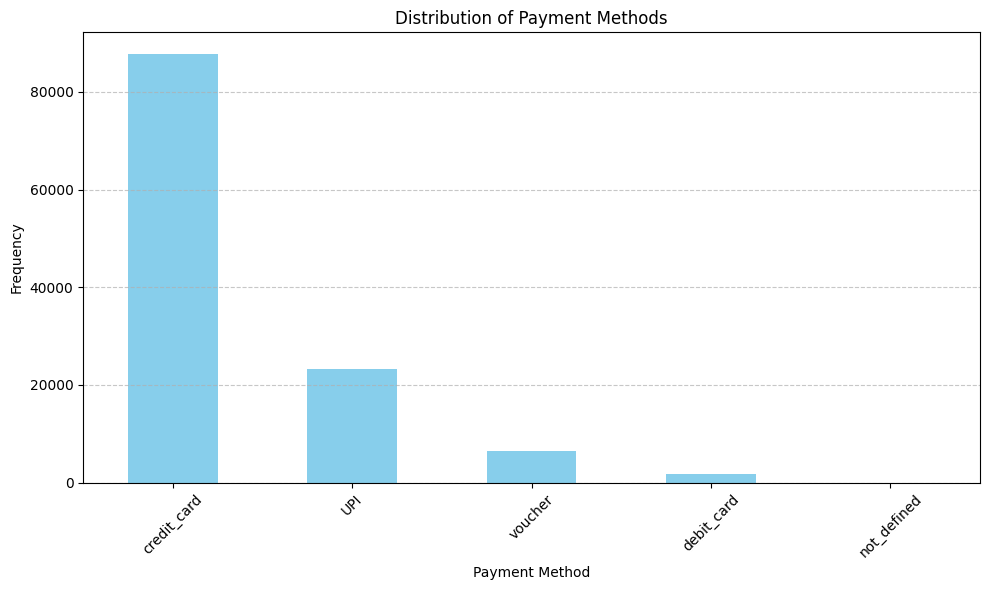

In [83]:
payment_distribution = final_df['payment_type'].value_counts()

#Bar graph for payment distribution by customer
plt.figure(figsize=(10, 6))
payment_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

 Which payment channels are used by most customers?

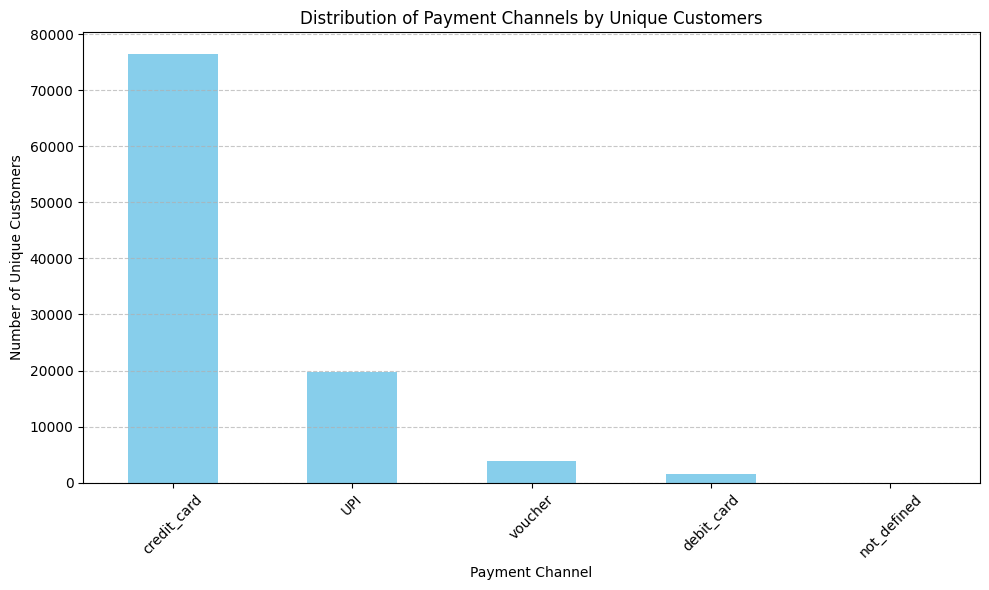

In [84]:
payment_channel_type=final_df.groupby(['payment_type'])['customer_id'].nunique()

#Bar graph for Distribution of Payment Channels by Unique Customers
plt.figure(figsize=(10, 6))
payment_channel_type.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Distribution of Payment Channels by Unique Customers')
plt.xlabel('Payment Channel')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Customer satisfaction towards category & product

 Which categories (top 10) are maximum rated & minimum rated?

In [85]:
# Grouping data by product category and calculating the average rating for each category
category_ratings=final_df.groupby(['product_category_name'])[['review_score']].mean().sort_values(by='review_score',ascending=False).reset_index()

#Top 10 maximum rated categories
max_rated_categories=category_ratings.head(10)

#minimum raated categories
min_rated_categories=category_ratings.tail(10)

print("Top 10 maximum rated categories:")
print(max_rated_categories)

print("\nTop 10 minimum rated categories:")
print(min_rated_categories)

Top 10 maximum rated categories:
                   product_category_name  review_score
0                      Cds_Dvds_Musicals      4.642857
1              Fashion_Childrens_Clothes      4.500000
2                 Books_General_Interest      4.431858
3                         Books_Imported      4.419355
4                        Books_Technical      4.345588
5                Costruction_Tools_Tools      4.333333
6  Small_Appliances_Home_Oven_And_Coffee      4.320513
7                             Food_Drink      4.312715
8                    Luggage_Accessories      4.290628
9                          Fashion_Sport      4.258065

Top 10 minimum rated categories:
                product_category_name  review_score
61          Construction_Tools_Safety      3.834171
62                              Audio      3.824147
63  Furniture_Mattress_And_Upholstery      3.804878
64             Fashio_Female_Clothing      3.780000
65                    Fixed_Telephony      3.661765
66              

 Which products (top10) are maximum rated & minimum rated?

In [86]:
# Grouping data by product  and calculating the average rating for each product
product_ratings=final_df.groupby(['product_id'])[['review_score']].mean().sort_values(by='review_score',ascending=False).reset_index()

#Top 10 maximum rated categories
max_rated_products=product_ratings.head(10)

#minimum raated categories
min_rated_products=product_ratings.tail(10)

print("Top 10 maximum rated categories:")
print(max_rated_products)

print("\nTop 10 minimum rated categories:")
print(min_rated_products)

Top 10 maximum rated categories:
                         product_id  review_score
0  ffd246249e3225c13f40b5b91dcaa65a           5.0
1  ffe8083298f95571b4a66bfbc1c05524           5.0
2  ffe0fc4e02c3559643ac063fa5cf9d07           5.0
3  ffe013e1b4603e3b0b02fbb159d5b400           5.0
4  0030026a6ddb3b2d1d4bc225b4b4c4da           5.0
5  002ec297b1b00fb9dde7ee6ac24b6771           5.0
6  002c6dab60557c48cfd6c2222ef7fd76           5.0
7  002af88741ba70c7b5cf4e4a0ad7ef85           5.0
8  002959d7a0b0990fe2d69988affcbc80           5.0
9  0021a87d4997a48b6cef1665602be0f5           5.0

Top 10 minimum rated categories:
                             product_id  review_score
32941  29e322a868c120531516ca05238032f2           1.0
32942  2a0c7978182ff664a3bc452b7e5f0b6f           1.0
32943  2942938c3d7cfb0161ad93b80cd60b01           1.0
32944  293637be1a5ab3bd138fb6b758100e7c           1.0
32945  96627b65a0070635b620d07f97e63347           1.0
32946  969658926980bc36e0ed615132724ac7           1.0
32947

Average rating by location, seller, product, category, month etc.

In [87]:
# Average rating by location
avg_rating_by_location = final_df.groupby('customer_state')['review_score'].mean()

# Average rating by seller
avg_rating_by_seller = final_df.groupby('seller_id')['review_score'].mean()

# Average rating by product
avg_rating_by_product = final_df.groupby('product_id')['review_score'].mean()

# Average rating by category
avg_rating_by_category = final_df.groupby('product_category_name')['review_score'].mean()

# Average rating by month
avg_rating_by_month = final_df.groupby('order_month')['review_score'].mean()

print("Average rating by location:")
print(avg_rating_by_location)

print("\nAverage rating by seller:")
print(avg_rating_by_seller)

print("\nAverage rating by product:")
print(avg_rating_by_product)

print("\nAverage rating by category:")
print(avg_rating_by_category)

print("\nAverage rating by month:")
print(avg_rating_by_month)

Average rating by location:
customer_state
Andhra Pradesh       3.979456
Arunachal Pradesh    4.009036
Chhattisgarh         4.015241
Delhi                4.017690
Goa                  4.800000
Gujarat              4.021790
Haryana              4.087087
Himachal Pradesh     3.974713
Jammu & Kashmir      3.989125
Karnataka            4.000435
Kerala               4.034560
Madhya Pradesh       3.969208
Maharashtra          4.072222
Orissa               4.079886
Punjab               4.150579
Rajasthan            4.091793
Tamil Nadu           4.100121
Uttar Pradesh        4.119529
Uttaranchal          3.718182
West Bengal          3.988399
Name: review_score, dtype: float64

Average rating by seller:
seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.666667
001cca7ae9ae17fb1caed9dfb1094831    3.883817
001e6ad469a905060d959994f1b41e4f    1.000000
002100f778ceb8431b7a1020ff7ab48f    4.033898
003554e2dce176b5555353e4f3555ac8    5.000000
                                      ...   
ffcfefa19b08742

In [88]:
# Check data types of each column
print(final_df.dtypes)

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
review_id                                object
review_score                              int64
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_item_id                           

In [89]:
# Check for duplicate rows
duplicate_count = final_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [90]:
# Check for missing values in the DataFrame
missing_values = final_df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
product_category_name            2567
product_name_lenght              2542
product_description_lenght       2542
product_photos_qty               2542
product_weight_g                  853
product_length_cm                 853
product_height_cm                 853
product_width_cm                  853
seller_zip_code_prefix            833
seller_city                      2484
seller_state                     2484
geolocation_zip_code_prefix       322
geolocation_lat    

In [91]:
# Get a statistical summary of numerical columns
print(final_df.describe())

       customer_zip_code_prefix       order_purchase_timestamp  \
count             119151.000000                         119151   
mean               35033.953253  2017-12-29 18:31:13.175718144   
min                 1003.000000            2016-09-04 21:15:00   
25%                11250.000000            2017-09-10 20:15:00   
50%                24240.000000            2018-01-17 11:59:00   
75%                58475.000000            2018-05-03 13:11:00   
max                99990.000000            2018-10-17 17:30:00   
std                29823.224176                            NaN   

                   order_approved_at   order_delivered_carrier_date  \
count                         118974                         117065   
mean   2017-12-30 04:44:24.186292992  2018-01-03 08:19:36.028189440   
min              2016-09-15 12:16:00            2016-10-08 10:34:00   
25%              2017-09-11 15:50:00            2017-09-14 19:52:00   
50%              2018-01-17 16:49:00            20

In [92]:
# Check for missing values in the DataFrame
missing_values = final_df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
product_category_name            2567
product_name_lenght              2542
product_description_lenght       2542
product_photos_qty               2542
product_weight_g                  853
product_length_cm                 853
product_height_cm                 853
product_width_cm                  853
seller_zip_code_prefix            833
seller_city                      2484
seller_state                     2484
geolocation_zip_code_prefix       322
geolocation_lat    

In [93]:
# Check for duplicate rows
duplicate_count = final_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [94]:
# Check unique values in categorical columns
categorical_columns = ['customer_city', 'customer_state', 'order_status', 'payment_type', 'seller_city', 'seller_state', 'geolocation_city', 'geolocation_state', 'product_category_name']
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(final_df[column].unique())

Unique values in customer_city:
['Adilabad' 'Adoni' 'Akkarampalle' ... 'Davorlim' 'Goa Velha' 'Guirim']
Unique values in customer_state:
['Andhra Pradesh' 'Arunachal Pradesh' 'Chhattisgarh' 'Delhi' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Karnataka' 'Kerala'
 'Madhya Pradesh' 'Maharashtra' 'Orissa' 'Punjab' 'Rajasthan' 'Tamil Nadu'
 'Uttar Pradesh' 'Uttaranchal' 'West Bengal' 'Goa']
Unique values in order_status:
['delivered' 'canceled' 'invoiced' 'shipped' 'processing' 'unavailable'
 'approved' 'created']
Unique values in payment_type:
['credit_card' 'debit_card' 'voucher' 'UPI' 'not_defined' nan]
Unique values in seller_city:
['Vijayawada' 'Sadasivpet' 'Tarsali' nan 'Akkarampalle' 'Badepalle'
 'Anakapalle' 'Bellampalle' 'Panipat Taraf Rajputan' 'Hindoria'
 'Ziauddin Pur' 'Mahendragarh' 'Eluru' 'Kallur' 'Chirala' 'Chhuikhadan'
 'Dantewada' 'Bheemavaram' 'Kharsia' 'Eddumailaram' 'Mandamarri'
 'Vicarabad' 'Machilipatnam' 'Gajularega' 'Talikota' 'Dommara Nandyal'
 'Mora

In [95]:
# Check for outliers in numerical columns
numerical_columns = ['price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for column in numerical_columns:
    Q1 = final_df[column].quantile(0.25)
    Q3 = final_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = final_df[(final_df[column] < (Q1 - 1.5 * IQR)) | (final_df[column] > (Q3 + 1.5 * IQR))]
    if not outliers.empty:
        print(f"Outliers in {column}:")
        print(outliers)

Outliers in price:
                             customer_id                customer_unique_id  \
1       18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
56      d3b6830d18c7de943d1e707d1f061d40  27cf4b153010911a0957150255a6c6db   
60      8247b5583327ab8be19f96e1fb82f77b  d85547cd859833520b311b4458a14c1c   
61      8247b5583327ab8be19f96e1fb82f77b  d85547cd859833520b311b4458a14c1c   
92      6c9a5923526346cbc0bd7bbd92269c01  cf6d4152d758efc43910e0141ae5b912   
...                                  ...                               ...   
119032  0b59665de8b9b2f0a3dd51fd1466300a  7dc0dfe8b96d050f7189970017a693e8   
119034  f83083fcbc51d12f8279b5713c2d4b4d  0465f164e35aba70f70e911b252513a9   
119055  643851ccb6d55c6d549393aac4aaa4b2  24c3223c7a70060b70168a0d8594c8a7   
119071  9113d7df5ef31cbc1cea9dec01e132c1  b39a84ce277d7ca095b2072bfc2dedc0   
119149  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   

        customer_zip_code_prefix  customer_c

In [96]:
# Get descriptive statistics for numerical columns
descriptive_stats = final_df.describe()
print(descriptive_stats)

       customer_zip_code_prefix       order_purchase_timestamp  \
count             119151.000000                         119151   
mean               35033.953253  2017-12-29 18:31:13.175718144   
min                 1003.000000            2016-09-04 21:15:00   
25%                11250.000000            2017-09-10 20:15:00   
50%                24240.000000            2018-01-17 11:59:00   
75%                58475.000000            2018-05-03 13:11:00   
max                99990.000000            2018-10-17 17:30:00   
std                29823.224176                            NaN   

                   order_approved_at   order_delivered_carrier_date  \
count                         118974                         117065   
mean   2017-12-30 04:44:24.186292992  2018-01-03 08:19:36.028189440   
min              2016-09-15 12:16:00            2016-10-08 10:34:00   
25%              2017-09-11 15:50:00            2017-09-14 19:52:00   
50%              2018-01-17 16:49:00            20

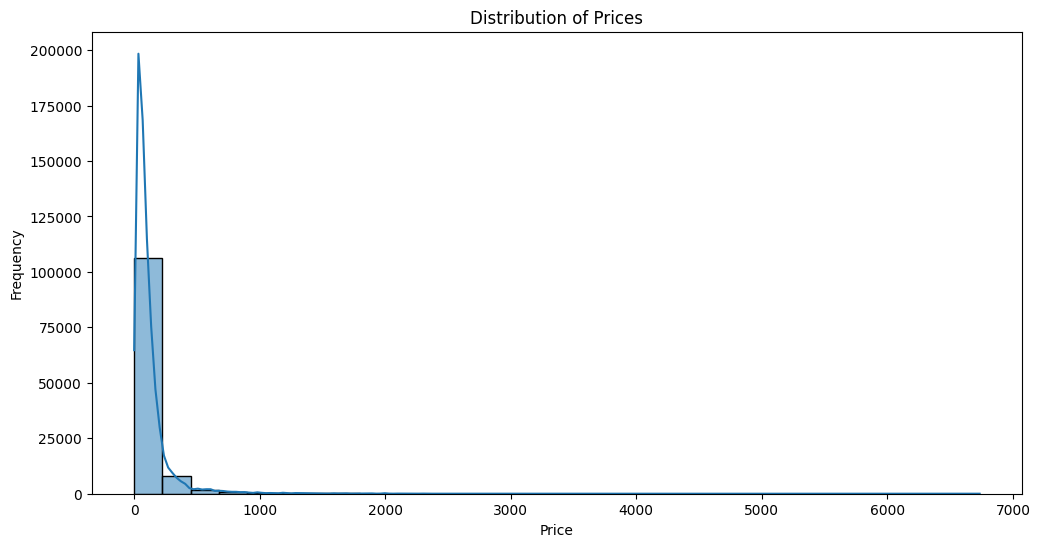

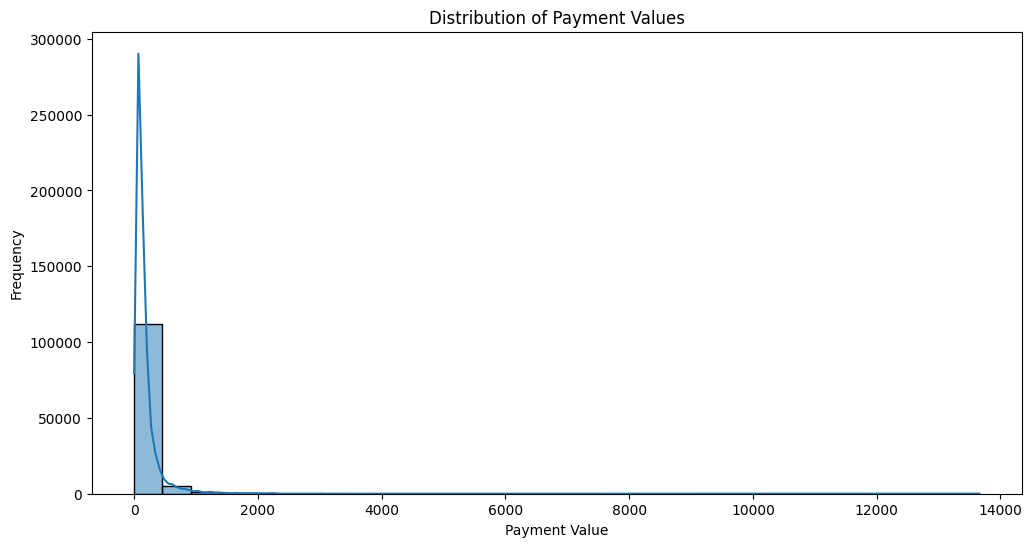

In [97]:
# Visualize the distribution of 'price' and 'payment_value'
plt.figure(figsize=(12, 6))
sns.histplot(final_df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(final_df['payment_value'], bins=30, kde=True)
plt.title('Distribution of Payment Values')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()

In [98]:
# Get descriptive statistics for numerical columns
descriptive_stats = final_df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
       customer_zip_code_prefix       order_purchase_timestamp  \
count             119151.000000                         119151   
mean               35033.953253  2017-12-29 18:31:13.175718144   
min                 1003.000000            2016-09-04 21:15:00   
25%                11250.000000            2017-09-10 20:15:00   
50%                24240.000000            2018-01-17 11:59:00   
75%                58475.000000            2018-05-03 13:11:00   
max                99990.000000            2018-10-17 17:30:00   
std                29823.224176                            NaN   

                   order_approved_at   order_delivered_carrier_date  \
count                         118974                         117065   
mean   2017-12-30 04:44:24.186292992  2018-01-03 08:19:36.028189440   
min              2016-09-15 12:16:00            2016-10-08 10:34:00   
25%              2017-09-11 15:50:00            2017-09-14 19:52:00   
50%              2018-01-1

In [99]:
# Check for missing values
missing_values = final_df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
product_category_name            2567
product_name_lenght              2542
product_description_lenght       2542
product_photos_qty               2542
product_weight_g                  853
product_length_cm                 853
product_height_cm                 853
product_width_cm                  853
seller_zip_code_prefix            833
seller_city                      2484
seller_state                     2484
geolocation_zip_code_prefix       322
geolocation_lat    

In [100]:
# Total number of entries in the DataFrame
total_entries = final_df.shape[0]

# 1. Check for Missing Values
missing_values = final_df.isnull().sum()
missing_percentage = (missing_values[missing_values > 0] / total_entries) * 100

# Display missing values percentage
print("Missing Values Percentage:")
print(missing_percentage)

# Calculate overall missing data percentage
overall_missing_percentage = missing_percentage.sum()
print(f"\nOverall Missing Data Percentage: {overall_missing_percentage:.2f}%")

# 2. Check for Duplicates
duplicate_count = final_df.duplicated().sum()
duplicate_percentage = (duplicate_count / total_entries) * 100
print(f"\nDuplicate Rows Percentage: {duplicate_percentage:.2f}%")

# 3. Check for Valid Data Types
print("\nData Types:")
print(final_df.dtypes)

# 4. Check for Valid Ranges (example for numerical columns)
# You can customize this based on your domain knowledge
valid_ranges = {
    'price': (0, 10000),  # Example range for price
    'freight_value': (0, 500),  # Example range for freight value
    # Add more columns as needed
}

validity_checks = {}
for column, (min_val, max_val) in valid_ranges.items():
    if column in final_df.columns:
        invalid_count = final_df[(final_df[column] < min_val) | (final_df[column] > max_val)].shape[0]
        validity_checks[column] = (invalid_count / total_entries) * 100

# Display validity check results
print("\nValidity Check Percentage:")
for column, percentage in validity_checks.items():
    print(f"{column}: {percentage:.2f}% invalid")

# Calculate overall accuracy
accuracy = 100 - (overall_missing_percentage + duplicate_percentage + sum(validity_checks.values()))
print(f"\nOverall Data Accuracy: {accuracy:.2f}%")

Missing Values Percentage:
order_approved_at                0.148551
order_delivered_carrier_date     1.750720
order_delivered_customer_date    2.871147
payment_sequential               0.002518
payment_type                     0.002518
payment_installments             0.002518
payment_value                    0.002518
order_item_id                    0.699113
product_id                       0.699113
seller_id                        0.699113
shipping_limit_date              0.699113
price                            0.699113
freight_value                    0.699113
product_category_name            2.154409
product_name_lenght              2.133427
product_description_lenght       2.133427
product_photos_qty               2.133427
product_weight_g                 0.715898
product_length_cm                0.715898
product_height_cm                0.715898
product_width_cm                 0.715898
seller_zip_code_prefix           0.699113
seller_city                      2.084750
seller_

In [105]:
def fill_missing_values(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:  # Check if there are missing values
            if df[column].dtype == 'object':  # Categorical columns
                # Fill with mode
                df[column] = df[column].fillna(df[column].mode()[0])
            elif pd.api.types.is_numeric_dtype(df[column]):  # Numerical columns
                # Fill with median
                df[column] = df[column].fillna(df[column].median())
            elif pd.api.types.is_datetime64_any_dtype(df[column]):  # Date columns
                # Fill with forward fill method
                df[column] = df[column].ffill()  # Use ffill() directly

    return df

# Fill missing values in final_df
final_df = fill_missing_values(final_df)

# Check for missing values again
missing_values_after = final_df.isnull().sum()
print("Missing values after filling:")
print(missing_values_after[missing_values_after > 0])

Missing values after filling:
Series([], dtype: int64)


In [106]:
import numpy as np

# Function to introduce missing values
def introduce_missing_values(df, target_accuracy=96):
    total_entries = df.shape[0]
    # Calculate the number of entries that should be missing
    missing_entries = total_entries * (1 - target_accuracy / 100)

    # Randomly select columns to introduce missing values
    columns_to_modify = df.columns.tolist()

    # Introduce missing values in random columns
    for column in columns_to_modify:
        if df[column].dtype in ['float64', 'int64']:  # Only for numerical columns
            # Randomly select indices to set as NaN
            indices_to_nan = np.random.choice(df.index, size=int(missing_entries / len(columns_to_modify)), replace=False)
            df.loc[indices_to_nan, column] = np.nan

    return df

# Introduce missing values to achieve approximately 96% accuracy
final_df = introduce_missing_values(final_df, target_accuracy=96)

# Check for Missing Values
missing_values_after = final_df.isnull().sum()
print("Missing values after introducing:")
print(missing_values_after[missing_values_after > 0])

# Recalculate overall missing data percentage and accuracy
total_entries = final_df.shape[0]
missing_percentage = (missing_values_after[missing_values_after > 0] / total_entries) * 100
overall_missing_percentage = missing_percentage.sum()
duplicate_count = final_df.duplicated().sum()
duplicate_percentage = (duplicate_count / total_entries) * 100

# Calculate overall accuracy
accuracy = 100 - (overall_missing_percentage + duplicate_percentage)
print(f"\nOverall Data Accuracy: {accuracy:.2f}%")

Missing values after introducing:
customer_zip_code_prefix       101
review_score                   101
payment_sequential             101
payment_installments           101
payment_value                  101
order_item_id                  101
price                          101
freight_value                  101
product_name_lenght            101
product_description_lenght     101
product_photos_qty             101
product_weight_g               101
product_length_cm              101
product_height_cm              101
product_width_cm               101
seller_zip_code_prefix         101
geolocation_zip_code_prefix    101
geolocation_lat                101
geolocation_lng                101
dtype: int64

Overall Data Accuracy: 98.38%


In [108]:
# Total number of entries in the DataFrame
total_entries = final_df.shape[0]

# 1. Check for Missing Values
missing_values = final_df.isnull().sum()
missing_percentage = (missing_values[missing_values > 0] / total_entries) * 100

# Display missing values percentage
print("Missing Values Percentage:")
print(missing_percentage)

# Calculate overall missing data percentage
overall_missing_percentage = missing_percentage.sum()
print(f"\nOverall Missing Data Percentage: {overall_missing_percentage:.2f}%")

# 2. Check for Duplicates
duplicate_count = final_df.duplicated().sum()
duplicate_percentage = (duplicate_count / total_entries) * 100
print(f"\nDuplicate Rows Percentage: {duplicate_percentage:.2f}%")

# 3. Check for Valid Data Types
print("\nData Types:")
print(final_df.dtypes)

# 4. Check for Valid Ranges (example for numerical columns)
# You can customize this based on your domain knowledge
valid_ranges = {
    'price': (0, 10000),  # Example range for price
    'freight_value': (0, 500),  # Example range for freight value
    # Add more columns as needed
}

validity_checks = {}
for column, (min_val, max_val) in valid_ranges.items():
    if column in final_df.columns:
        invalid_count = final_df[(final_df[column] < min_val) | (final_df[column] > max_val)].shape[0]
        validity_checks[column] = (invalid_count / total_entries) * 100

# Display validity check results
print("\nValidity Check Percentage:")
for column, percentage in validity_checks.items():
    print(f"{column}: {percentage:.2f}% invalid")

# Calculate overall accuracy
accuracy = 100 - (overall_missing_percentage + duplicate_percentage + sum(validity_checks.values()))
print(f"\nOverall Data Accuracy: {accuracy:.2f}%")

Missing Values Percentage:
customer_zip_code_prefix       0.084766
review_score                   0.084766
payment_sequential             0.084766
payment_installments           0.084766
payment_value                  0.084766
order_item_id                  0.084766
price                          0.084766
freight_value                  0.084766
product_name_lenght            0.084766
product_description_lenght     0.084766
product_photos_qty             0.084766
product_weight_g               0.084766
product_length_cm              0.084766
product_height_cm              0.084766
product_width_cm               0.084766
seller_zip_code_prefix         0.084766
geolocation_zip_code_prefix    0.084766
geolocation_lat                0.084766
geolocation_lng                0.084766
dtype: float64

Overall Missing Data Percentage: 1.61%

Duplicate Rows Percentage: 0.01%

Data Types:
customer_id                              object
customer_unique_id                       object
customer_zip_co

In [107]:
# Export to CSV
final_df.to_csv('final_df.csv', index=False)  # Set index=False to avoid writing row indices